In [3]:
import numpy as np
import pandas as pd
import nltk
import string
import ast
import re

In [4]:
#reading the pickle file to get the same format
recipe_df = pd.read_pickle('ingredientdata.pkl')

In [5]:
#selecting the parsed ingredient data created in the database
ingredient = recipe_df['ingredients_parsed']

In [6]:
ingredient.head(5)

0    [karela, onion, flour, amchur mango, sunflower...
1    [rice, tomato, bc belle bhat, chickpea lentil,...
2    [rice vermicelli noodle, onion, carrot, pea, u...
3     [chana dal, urad dal, onion, tomato, use, curry]
4    [rice soaked minute, moong dal soaked minute, ...
Name: ingredients_parsed, dtype: object

In [7]:
#making the entire ingredient lists as a single list
ing = [item for sublist in ingredient for item in sublist]

In [8]:
#converting the list into string to take out each word with split function to make the string search easier
ingstr = ' '.join(map(str,ing))
ing = ingstr.strip().split(" ")
ing = pd.Series(ing).str.strip()
ing = ing.str.lower()


In [9]:
#reading the category database which contains ingredients categorized into vegetable,fruit,meat etc
category = pd.read_csv('category.csv')
category.head(5)

,items,Ingredient Synonyms,Entity ID,Category
0,Egg,egg,0,Meat
1,Bread,bread; bun,2,Bakery
2,Rye Bread,bread-rye,3,Bakery
3,Wheaten Bread,bread-wheaten,4,Bakery
4,White Bread,bread-white; baguette,5,Bakery


In [10]:
categoryindex = category.set_index('Category')
categoryindex

,items,Ingredient Synonyms,Entity ID
Category,,,
Meat,Egg,egg,0
Bakery,Bread,bread; bun,2
Bakery,Rye Bread,bread-rye,3
Bakery,Wheaten Bread,bread-wheaten,4
Bakery,White Bread,bread-white; baguette,5
...,...,...,...
Additive,Citric Acid,citric acid,998
Additive,Cooking Spray,cooking spray,999
Additive,Gelatin,gelatin,1000


In [11]:
# seperating vegetable and fruit category from the dataframe and converting into string with lower case
vegetable = categoryindex.loc[["Vegetable"],["items"]]
fruit = categoryindex.loc[["Fruit"],["items"]]
vegetable.reset_index(drop=True,inplace=True)
vegetable = vegetable['items'].copy().str.lower()
fruit.reset_index(drop=True,inplace=True)
fruit = fruit['items'].copy().str.lower()

In [12]:
#looping and checking the ingredients with vegetable and fruit category
list_of_vegetable = []
for i in ing:
    for k in vegetable:
        if k in i:
            k = k.capitalize()
            list_of_vegetable.append(k)
list_of_vegetable = pd.Series(list_of_vegetable)
list_of_fruit = []
for i in ing:
    for k in fruit:
        if k in i:
            k = k.capitalize()
            list_of_fruit.append(k)
list_of_fruit = pd.Series(list_of_fruit)

In [13]:
list_of_vegetable = list_of_vegetable.value_counts()
list_of_fruit = list_of_fruit.value_counts()

In [14]:
#shortlisting only vegetables with more than 20 count
list_of_vegetable = list_of_vegetable[list_of_vegetable.values > 20]
list_of_fruit = list_of_fruit[list_of_fruit.values > 20]

In [15]:
#converting list of vegetables and list of fruits into a dataframe with Freq and Percentage columns
list_of_vegetable = pd.DataFrame(list_of_vegetable)
list_of_vegetable.columns = ['Freq']
list_of_vegetable['percentage'] = list_of_vegetable.apply(lambda x: round((x/len(ingredient)),2))
list_of_fruit = pd.DataFrame(list_of_fruit)
list_of_fruit.columns = ['Freq']
list_of_fruit['percentage'] = list_of_fruit.apply(lambda x: round((x/len(ingredient)),2))

In [305]:
list_of_vegetable

,Freq,percentage
Onion,2889,0.47
Tomato,1704,0.28
Potato,712,0.12
Carrot,596,0.10
Spinach,289,0.05
Cabbage,183,0.03
Cucumber,166,0.03
Broccoli,136,0.02
Cauliflower,127,0.02
Beetroot,94,0.02


In [306]:
list_of_fruit

,Freq,percentage
Coconut,1364,0.22
Lemon,1256,0.20
Mango,436,0.07
Banana,211,0.03
Apple,191,0.03
Raisin,178,0.03
Orange,152,0.02
Pear,126,0.02
Strawberry,83,0.01
Pineapple,74,0.01


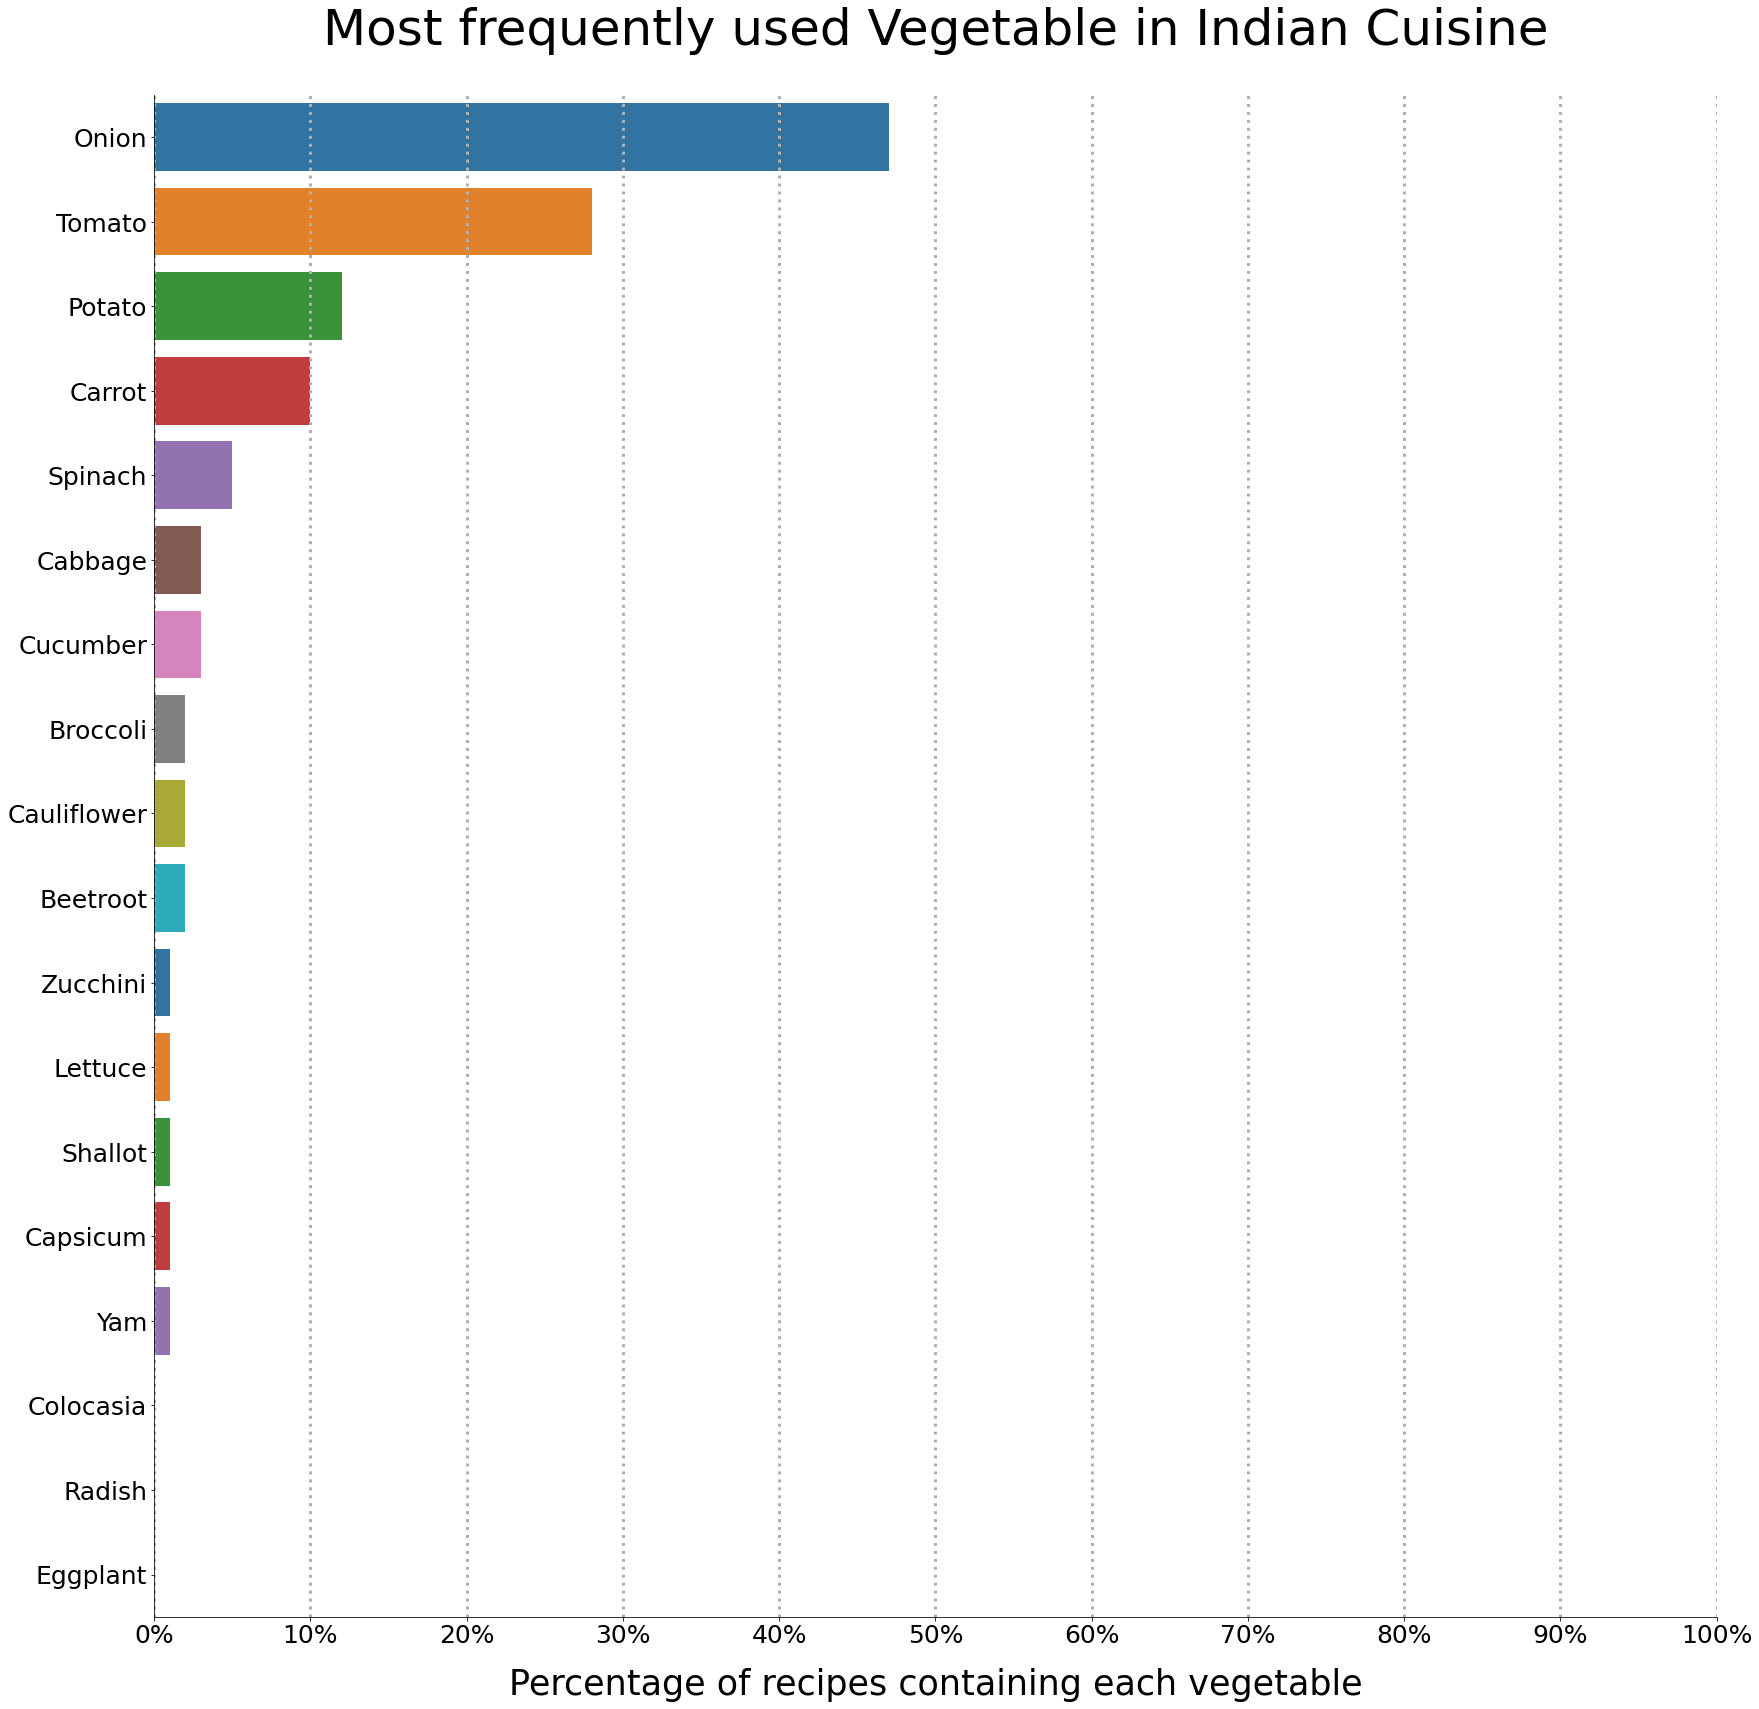

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

#create fig, axes
fig, ax = plt.subplots(figsize=(28, 28))

#create barplot
sns.barplot(y=list_of_vegetable.index, x=list_of_vegetable['percentage'], 
            data = list_of_vegetable, orientation = 'horizontal',  palette="tab10")
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);
sns.despine()

# titles, labels
ax.set_title('Most frequently used Vegetable in Indian Cuisine', fontsize = 50, pad = 50);
ax.set_xlabel('Percentage of recipes containing each vegetable', fontsize = 35, labelpad = 20);
ax.set_xticks(np.linspace(0,1,11), minor = False)

# set x axis to percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

# create grid for better readability
ax.grid(axis = 'x', linestyle = ':', linewidth = 3)

plt.show()

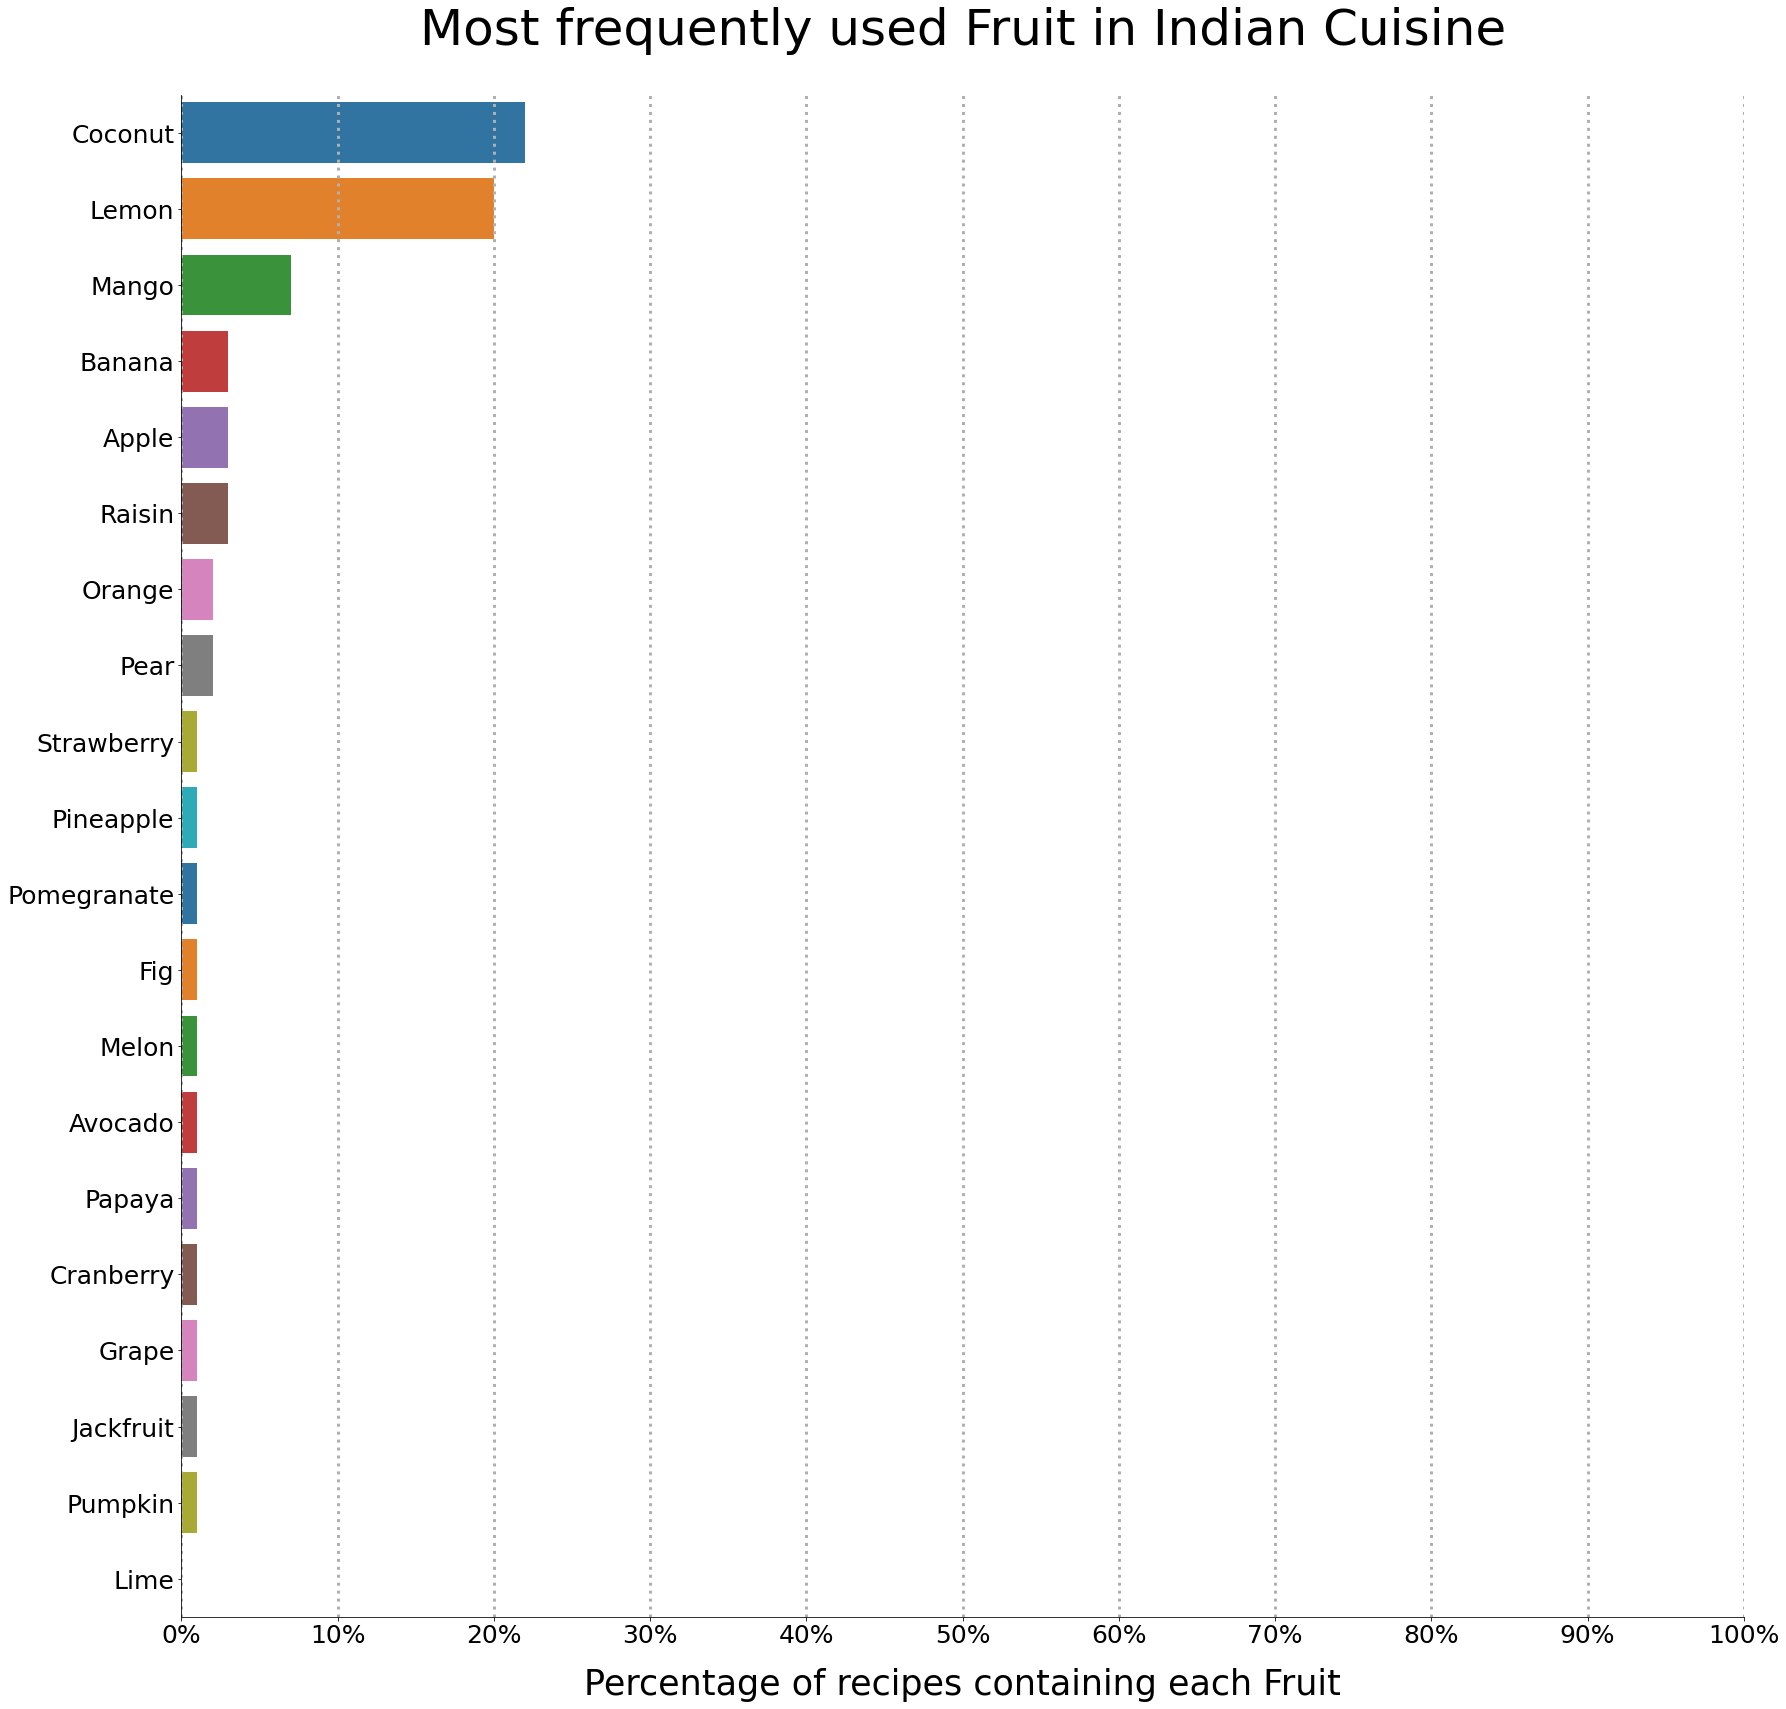

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

#create fig, axes
fig, ax = plt.subplots(figsize=(28, 28))

#create barplot
sns.barplot(y=list_of_fruit.index, x=list_of_fruit['percentage'], 
            data = list_of_fruit, orientation = 'horizontal',  palette="tab10")
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);
sns.despine()

# titles, labels
ax.set_title('Most frequently used Fruit in Indian Cuisine', fontsize = 50, pad = 50);
ax.set_xlabel('Percentage of recipes containing each Fruit', fontsize = 35, labelpad = 20);
ax.set_xticks(np.linspace(0,1,11), minor = False)

# set x axis to percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

# create grid for better readability
ax.grid(axis = 'x', linestyle = ':', linewidth = 3)

plt.show()

In [ ]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
dataset = open("sampleWords.txt", "r").read()
defcreate_word_cloud(string):
   maskArray = npy.array(Image.open("cloud.png"))
   cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
dataset = dataset.lower()
create_word_cloud(dataset)